# РК 1 Сукач Елизавета
# группа ИУ5-23М 
## вариант 6 - датасет 6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")


In [4]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('/Users/elizavetasukach/Admission_Predict.csv', sep=",")

# Основные характеристики датасета

In [5]:
# Первые 5 строк датасета
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Размер датасета - 400 строк, 7 колонок
data.shape

(400, 9)

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 400


In [8]:

# Список колонок
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
# Список колонок с типами данных
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [11]:
# Основные статистические характеристки набора данных
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [12]:
# Определим уникальные значения для целевого признака
data['Research'].unique()

array([1, 0])

# Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены.

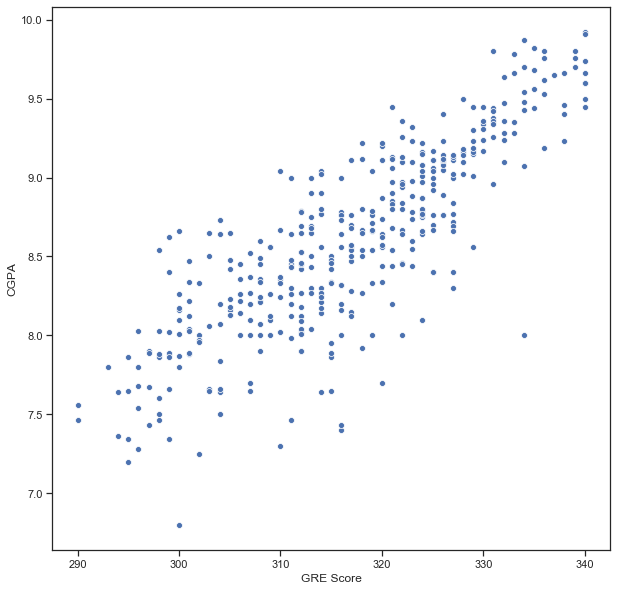

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='CGPA', data=data)

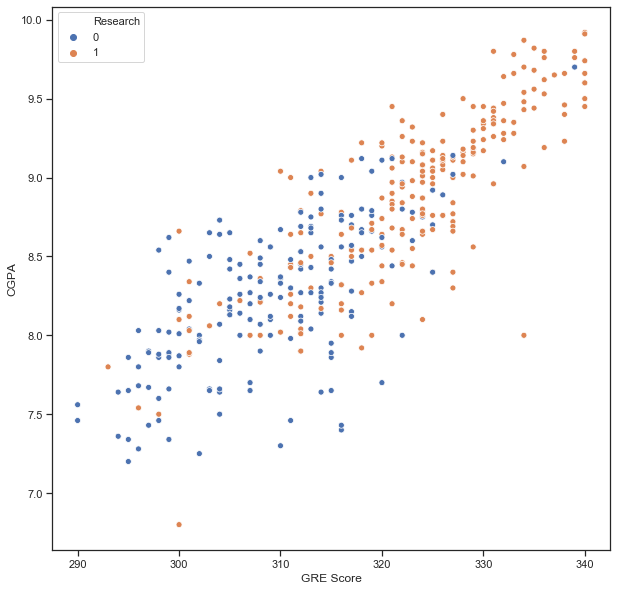

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='GRE Score', y='CGPA', data=data, hue='Research')

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

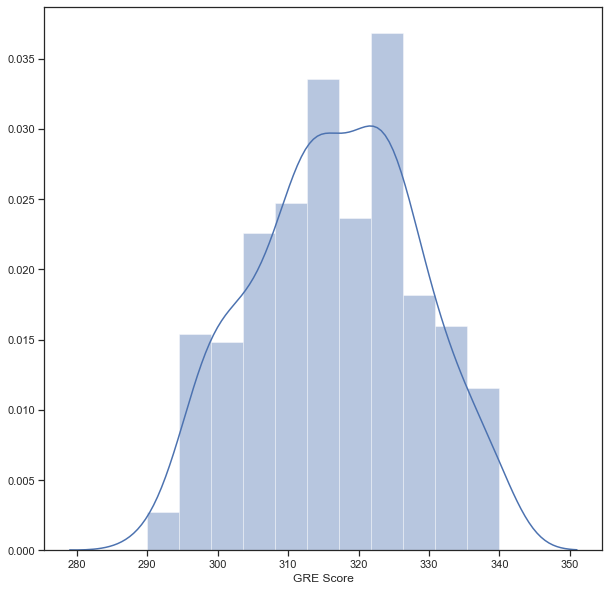

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['GRE Score'])

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

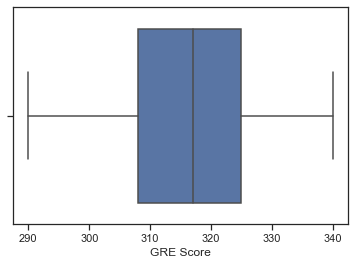

In [19]:
sns.boxplot(x=data['GRE Score'])

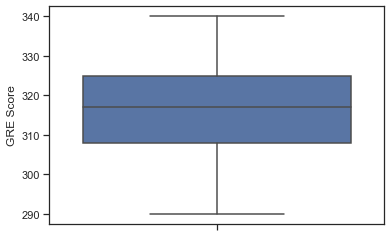

In [20]:
sns.boxplot(y=data['GRE Score'])

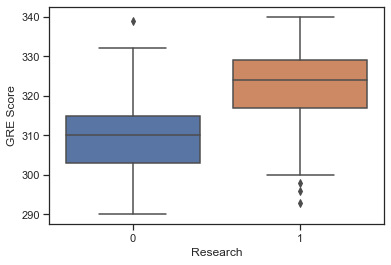

In [21]:
sns.boxplot(x='Research', y='GRE Score', data=data)

#  Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:  
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Research"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.  
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [22]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

In [ ]:
На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно ним с чем не коррелирует. 
- Целевой признак отчасти коррелирует с GRE Score (0.58), CGPA (0,52), Chance of Admit (0,55). Эти признаки стоит оставить в модели.
- Целевой признак слабо коррелирует с Serial No. (-0,06). Этот признак означает порядковый номер и должен остаться в модели.
- Параметр GRE Score cильно коррелирует с TOEFL Score (0.83), CGPA (0.83), Chance of Admit (0.8). Chance of Admit сильно коррелирует с TOEFL Score (0.79), CGPA (0.87). 

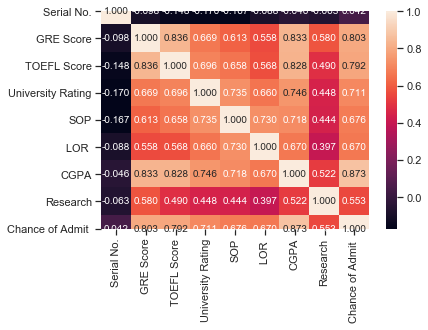

In [23]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')